<a href="https://colab.research.google.com/github/PaschalisLagias/SportsRating/blob/main/Wk7_Sports_Rating_and_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rating and Ranking of Premier League Teams with Massey, Colley and Keener Methods

Data provided for 3 seasons:


1.   2017 - 2018
2.   2018 - 2019
3.   2019 - 2020


Results have been downloaded from [this webpage](https://www.footballwebpages.co.uk/premier-league/match-grid/2021-2022)

## Import necessary Python packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Set pandas and numpy options for printing results

In [40]:
np.set_printoptions(linewidth=1000)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

## Premier League Champions:

*   **2017 - 2018**: Manchester City (19 points gap from the second team, Manchester United)
*   **2018 - 2019**: Manchester City (1 point gap from Liverpool that finished second)
*   **2019 - 2020**: Liverpool (18 points gap from Manchester City that finished second)



## File names

In [41]:
# League table files
premier_league_table_2017_2018 = "2017_2018_LeagueTable.csv"
premier_league_table_2018_2019 = "2018_2019_LeagueTable.csv"
premier_league_table_2019_2020 = "2019_2020_LeagueTable.csv"

# Match grid files
premier_league_match_grid_2017_2018 = "2017_2018_MatchGrid.csv"
premier_league_match_grid_2018_2019 = "2018_2019_MatchGrid.csv"
premier_league_match_grid_2019_2020 = "2017_2018_MatchGrid.csv"

## Set current working data files and next season files

Hint: Change these variables in case you would like to rate / rank teams based on a different season and check the estimates against the actual rankings of the following season.

In [42]:
# Current (working) season
current_league_table_file = premier_league_table_2017_2018
current_match_grid_file = premier_league_match_grid_2017_2018
current_season = "2017 - 2018"

# Next season
coming_league_table_file = premier_league_table_2018_2019
coming_match_grid_file = premier_league_match_grid_2018_2019
coming_season = "2018 - 2019"

# 1 Massey from Premiership league table





## Import the league table of the "current" season

In [43]:
# Read the league table data - skip the first row
league_table = pd.read_csv(current_league_table_file, skiprows=1)
league_table["Actual_Ranking"] = np.arange(1, 21)

league_table

,Unnamed: 0,Unnamed: 1,P,W,D,L,P.1,W.1,D.1,L.1,P.2,W.2,D.2,L.2,F,A,+/-,Pts,Actual_Ranking
0,C,Manchester City,19,16,2,1,19,16,2,1,38,32,4,2,106,27,79,100,1
1,2,Manchester United,19,15,2,2,19,10,4,5,38,25,6,7,68,28,40,81,2
2,3,Tottenham Hotspur,19,13,4,2,19,10,4,5,38,23,8,7,74,36,38,77,3
3,4,Liverpool,19,12,7,0,19,9,5,5,38,21,12,5,84,38,46,75,4
4,5,Chelsea,19,11,4,4,19,10,3,6,38,21,7,10,62,38,24,70,5
5,6,Arsenal,19,15,2,2,19,4,4,11,38,19,6,13,74,51,23,63,6
6,7,Burnley,19,7,5,7,19,7,7,5,38,14,12,12,36,39,-3,54,7
7,8,Everton,19,10,4,5,19,3,6,10,38,13,10,15,44,58,-14,49,8
8,9,Leicester City,19,7,6,6,19,5,5,9,38,12,11,15,56,60,-4,47,9
9,10,Newcastle United,19,8,4,7,19,4,4,11,38,12,8,18,39,47,-8,44,10


## Keep columns about goals scored and rename for clarity

In [44]:
required_cols = ["Unnamed: 1", "P.2", "F", "A", "+/-", "Pts", "Actual_Ranking"]
renaming = {
    "Unnamed: 1": "Teams", 
    "P.2": "Total_Matches_Played", 
    "F": "Goals_Scored",
    "A": "Goals_Conceded",
    "+/-": "Goal_Difference",
    "Pts": "Points"
    }

# Make a copy of the league table, keeping only the necessary columns renamed
league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
)

league_table

,Teams,Total_Matches_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking
0,Manchester City,38,106,27,79,100,1
1,Manchester United,38,68,28,40,81,2
2,Tottenham Hotspur,38,74,36,38,77,3
3,Liverpool,38,84,38,46,75,4
4,Chelsea,38,62,38,24,70,5
5,Arsenal,38,74,51,23,63,6
6,Burnley,38,36,39,-3,54,7
7,Everton,38,44,58,-14,49,8
8,Leicester City,38,56,60,-4,47,9
9,Newcastle United,38,39,47,-8,44,10


## Create M and p matrices of Massey's method

Below a refresher of the relevant formulas



$$
\mathbf{M} \mathbf{r} = \mathbf{\mathbf{p}}
$$
<br>
<br>

$$\text{Massey Matrix - last row elements set to 1:}$$
<br>
$$
\mathbf{M}_{n \times n} = \begin{pmatrix}
  38 & -2 & -2 & \dots & -2\\
  -2 & 38 & -2 & \dots & -2\\
  -2 & -2 & 38 & \dots & -2\\
  \vdots & \vdots & \vdots & \ddots & -2\\
  1 & 1 & 1 & \dots & 1\\
  \end{pmatrix}$$
<br>
<br>

$$\text{Goal Difference Column Vector:}$$
<br>
$$\mathbf{\mathbf{p}}_{n \times 1} = \begin{pmatrix}
p_1\\
p_2\\
p_3\\
\vdots \\
p_n
\end{pmatrix}$$
<br>

$$\text{Looking for the Ratings Vector:}$$
<br>
$$\\\mathbf{r}_{n \times 1} = \begin{pmatrix}
r_1\\
r_2\\
r_3\\
\vdots \\
r_n
\end{pmatrix}$$
<br>

$$\text{Solution: }  \mathbf{r} = \mathbf{M}^{-1} \mathbf{p}$$

In [45]:
# Useful constants
N_TEAMS = len(league_table)
MATCHES_PLAYED_PER_TEAM = 2 * (N_TEAMS - 1)

# Create M matrix: non-diagonal elements are the negated number of matches
# played between each pair of teams. Diagonal elements are the total matches
# played per team (both home and away).
M = -2 * np.ones((N_TEAMS, N_TEAMS))
diagonal = np.ones((1, N_TEAMS)) * MATCHES_PLAYED_PER_TEAM
last_row = np.ones((1, N_TEAMS))
M[-1:] = last_row
np.fill_diagonal(M, diagonal)

# Create p column vector with goal difference. Shape: (N_TEAMS, 1)
p = league_table["Goal_Difference"].to_numpy().reshape((-1, 1))

## Solve the system and calculate Massey rankings and ratings - use MinMaxScaler for easier plotting of ratings further below

[Link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for sklearn MinMaxScaler documentation

In [46]:
# Solve the equation system to calculate ratings and add them to the data
r = np.linalg.inv(M).dot(p)
league_table["Massey_Rating"] = r

# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
league_table["Massey_Scaled_Rating"] = min_max_scaler.fit_transform(
    league_table.loc[:, "Massey_Rating"].to_numpy().reshape(-1, 1)
)

# Sort the data by calculated ratings and get Massey ranking
league_table = league_table.sort_values("Massey_Rating", ascending=False)
league_table["Massey_Ranking"] = np.arange(1, 21)

## Keep a data copy to compile ratings and rankings from all methods

In [47]:
compiled_results = (
    league_table
    .sort_values("Actual_Ranking", ascending=True)
    .copy()
    )

In [48]:
# Run this if you would like to check the "compiled_results"
compiled_results

,Teams,Total_Matches_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking,Massey_Rating,Massey_Scaled_Rating,Massey_Ranking
0,Manchester City,38,106,27,79,100,1,1.942105,100.000000,1
1,Manchester United,38,68,28,40,81,2,0.967105,65.178571,3
2,Tottenham Hotspur,38,74,36,38,77,3,0.917105,63.392857,4
3,Liverpool,38,84,38,46,75,4,1.117105,70.535714,2
4,Chelsea,38,62,38,24,70,5,0.567105,50.892857,5
5,Arsenal,38,74,51,23,63,6,0.542105,50.000000,6
6,Burnley,38,36,39,-3,54,7,-0.107895,26.785714,7
7,Everton,38,44,58,-14,49,8,-0.382895,16.964286,11
8,Leicester City,38,56,60,-4,47,9,-0.132895,25.892857,8
9,Newcastle United,38,39,47,-8,44,10,-0.232895,22.321429,9


## Plot Massey scaled rating and ranking side by side with actual ranking and points scored

Documentation for [matplotlib.pyplot horizontal bar plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html)

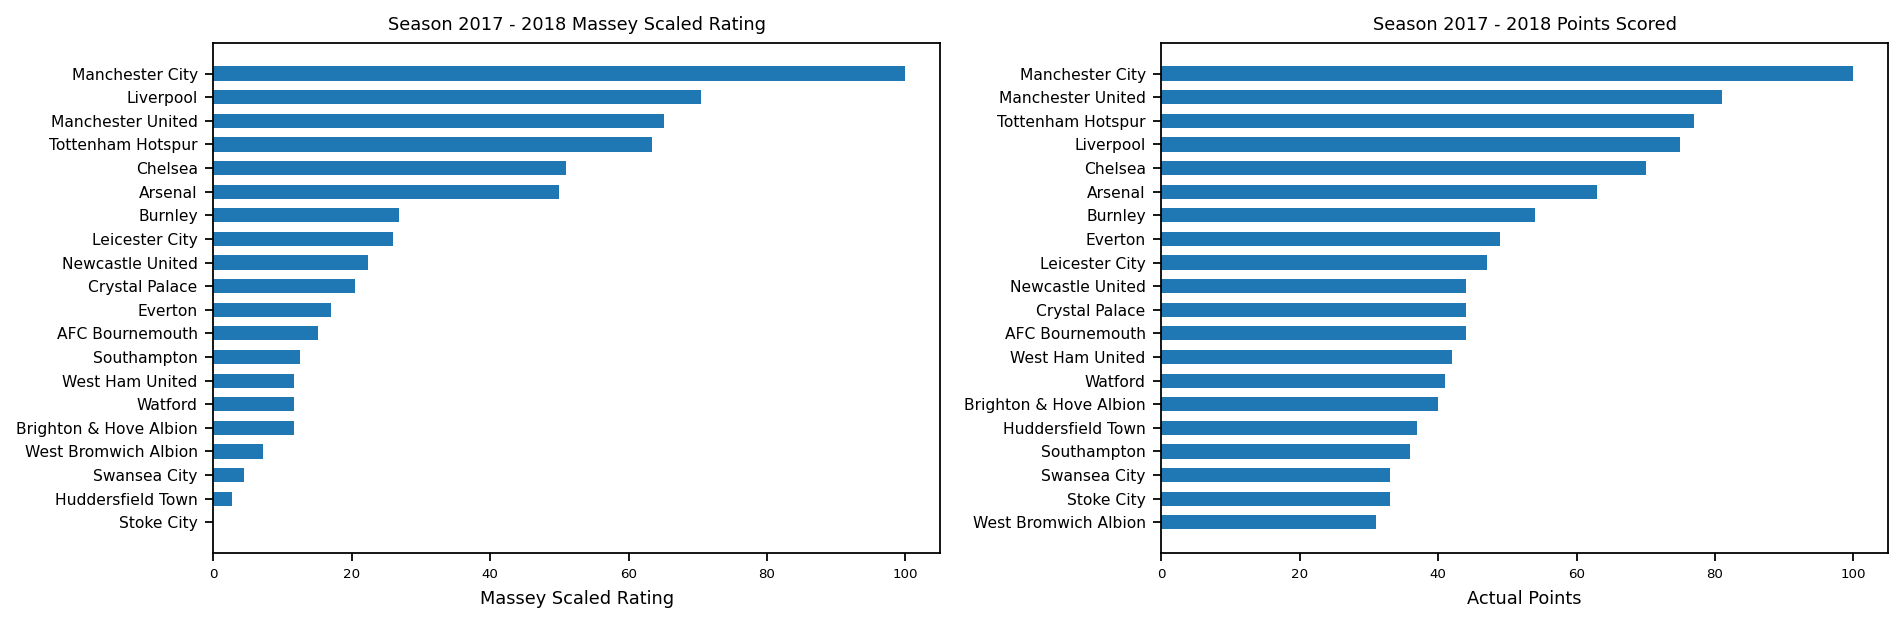

In [49]:
# Initialize grid of plots
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=160)

# Plot Massey scaled rating - plot 0, row 0
axis[0].barh(
    league_table["Massey_Ranking"], 
    league_table["Massey_Scaled_Rating"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[0].set_yticks(
    league_table["Massey_Ranking"], 
    labels=league_table["Teams"],
    fontsize=7
    )
axis[0].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[0].tick_params(axis="x", labelsize=6)
axis[0].set_xlabel('Massey Scaled Rating', fontsize=8)
axis[0].set_title(f'Season {current_season} Massey Scaled Rating', fontsize=8)

# Plot actual ranking and points scored - plot 1, row 0
axis[1].barh(
    league_table["Actual_Ranking"], 
    league_table["Points"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[1].set_yticks(
    league_table["Actual_Ranking"], 
    labels=league_table["Teams"],
    fontsize=7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[1].tick_params(axis="x", labelsize=6)
axis[1].set_xlabel('Actual Points', fontsize=8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize=8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

# 2. Colley

## Read league table, keep columns relevant to wins and losses, and rename them

In [50]:
# Read the league table data - skip the first row
league_table = pd.read_csv("2017_2018_LeagueTable.csv", skiprows=1)
league_table["Actual_Ranking"] = np.arange(1, 21)

In [51]:
required_cols = ["Unnamed: 1", "P.2", "W.2", "D.2", "L.2", "Pts", "Actual_Ranking"]
renaming = {
    "Unnamed: 1": "Teams", 
    "P.2": "Total_Matches_Played", 
    "W.2": "Wins",
    "D.2": "Draws",
    "L.2": "Losses",
    "Pts": "Points"
    }

league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
)

league_table

,Teams,Total_Matches_Played,Wins,Draws,Losses,Points,Actual_Ranking
0,Manchester City,38,32,4,2,100,1
1,Manchester United,38,25,6,7,81,2
2,Tottenham Hotspur,38,23,8,7,77,3
3,Liverpool,38,21,12,5,75,4
4,Chelsea,38,21,7,10,70,5
5,Arsenal,38,19,6,13,63,6
6,Burnley,38,14,12,12,54,7
7,Everton,38,13,10,15,49,8
8,Leicester City,38,12,11,15,47,9
9,Newcastle United,38,12,8,18,44,10


## Create C and b matrices of Colley's method

Below a refresher of the relevant formulas

$$
\mathbf{C} \mathbf{r} = \mathbf{\mathbf{b}}
$$
<br>

$$\text{Colley Matrix:}$$
<br>
$$
\mathbf{C}_{n \times n} = \begin{pmatrix}
  40 & -2 & -2 & \dots & -2\\
  -2 & 40 & -2 & \dots & -2\\
  -2 & -2 & 40 & \dots & -2\\
  \vdots & \vdots & \vdots & \ddots & -2\\
  -2 & -2 & -2 & \dots & 40\\
  \end{pmatrix}$$
<br>

$$\text{Wins - Losses Difference Column Vector:}$$
<br>
$$\mathbf{\mathbf{b}}_{n \times 1} = \begin{pmatrix}
b_1\\
b_2\\
b_3\\
\vdots \\
b_n
\end{pmatrix}$$
<br>

$$\text{Looking for the Ratings Vector:}$$
<br>
$$\\\mathbf{r}_{n \times 1} = \begin{pmatrix}
r_1\\
r_2\\
r_3\\
\vdots \\
r_n
\end{pmatrix}$$
<br>

$$\text{Solution: }  \mathbf{r} = \mathbf{C}^{-1} \mathbf{b}$$

In [52]:
# Useful constants
N_TEAMS = len(league_table)
MATCHES_PLAYED_PER_TEAM = 2 * (N_TEAMS - 1)

# Create C matrix: non-diagonal elements are the negated number of matches
# played between each pair of teams. Diagonal elements are the total matches
# played per team (both home and away) plus 2.
C = -2 * np.ones((N_TEAMS, N_TEAMS))
diagonal = np.ones((1, N_TEAMS)) * MATCHES_PLAYED_PER_TEAM + 2
np.fill_diagonal(C, diagonal)

# Create B column vector with goal difference. Shape: (n_teams, 1)
b = 1 + 0.5 * (league_table["Wins"] - league_table["Losses"])

# reshape B to be a column vector of (N_TEAMS, 1)
b = b.to_numpy().reshape(-1, 1)

In [53]:
# Solve the equation system to calculate ratings and add them to the data
r = np.linalg.inv(C).dot(b)
league_table["Colley_Rating"] = r

# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
league_table["Colley_Scaled_Rating"] = min_max_scaler.fit_transform(
    league_table.loc[:, "Colley_Rating"].to_numpy().reshape(-1, 1)
)

# Sort the data by calculated ratings and get Colley rankings
league_table = league_table.sort_values("Colley_Rating", ascending=False)
league_table["Colley_Ranking"] = np.arange(1, 21)

league_table

,Teams,Total_Matches_Played,Wins,Draws,Losses,Points,Actual_Ranking,Colley_Rating,Colley_Scaled_Rating,Colley_Ranking
0,Manchester City,38,32,4,2,100,1,0.857143,100.000000,1
1,Manchester United,38,25,6,7,81,2,0.714286,72.093023,2
2,Tottenham Hotspur,38,23,8,7,77,3,0.690476,67.441860,3
3,Liverpool,38,21,12,5,75,4,0.690476,67.441860,4
4,Chelsea,38,21,7,10,70,5,0.630952,55.813953,5
5,Arsenal,38,19,6,13,63,6,0.571429,44.186047,6
6,Burnley,38,14,12,12,54,7,0.523810,34.883721,7
7,Everton,38,13,10,15,49,8,0.476190,25.581395,8
8,Leicester City,38,12,11,15,47,9,0.464286,23.255814,9
11,AFC Bournemouth,38,11,11,16,44,12,0.440476,18.604651,10


## Keep some columns for the dataset that will hold results from all methods

In [54]:
cols_to_keep = [
    "Teams", "Wins", "Draws", "Losses", 
    "Colley_Rating", "Colley_Scaled_Rating", "Colley_Ranking"
    ]

# Data needed from Colley output
data_to_keep = (
    league_table
    .sort_values("Actual_Ranking", ascending=True)
    .loc[:, cols_to_keep]
    .copy()
    )

# Merge the data with 'compiled_results' dataframe (inner join on 'Teams')
compiled_results = (compiled_results.merge(data_to_keep, on="Teams"))
compiled_results

,Teams,Total_Matches_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking,Massey_Rating,Massey_Scaled_Rating,Massey_Ranking,Wins,Draws,Losses,Colley_Rating,Colley_Scaled_Rating,Colley_Ranking
0,Manchester City,38,106,27,79,100,1,1.942105,100.000000,1,32,4,2,0.857143,100.000000,1
1,Manchester United,38,68,28,40,81,2,0.967105,65.178571,3,25,6,7,0.714286,72.093023,2
2,Tottenham Hotspur,38,74,36,38,77,3,0.917105,63.392857,4,23,8,7,0.690476,67.441860,3
3,Liverpool,38,84,38,46,75,4,1.117105,70.535714,2,21,12,5,0.690476,67.441860,4
4,Chelsea,38,62,38,24,70,5,0.567105,50.892857,5,21,7,10,0.630952,55.813953,5
5,Arsenal,38,74,51,23,63,6,0.542105,50.000000,6,19,6,13,0.571429,44.186047,6
6,Burnley,38,36,39,-3,54,7,-0.107895,26.785714,7,14,12,12,0.523810,34.883721,7
7,Everton,38,44,58,-14,49,8,-0.382895,16.964286,11,13,10,15,0.476190,25.581395,8
8,Leicester City,38,56,60,-4,47,9,-0.132895,25.892857,8,12,11,15,0.464286,23.255814,9
9,Newcastle United,38,39,47,-8,44,10,-0.232895,22.321429,9,12,8,18,0.428571,16.279070,13


## Plot Colley scaled rating and ranking side by side with actual ranking and points scored

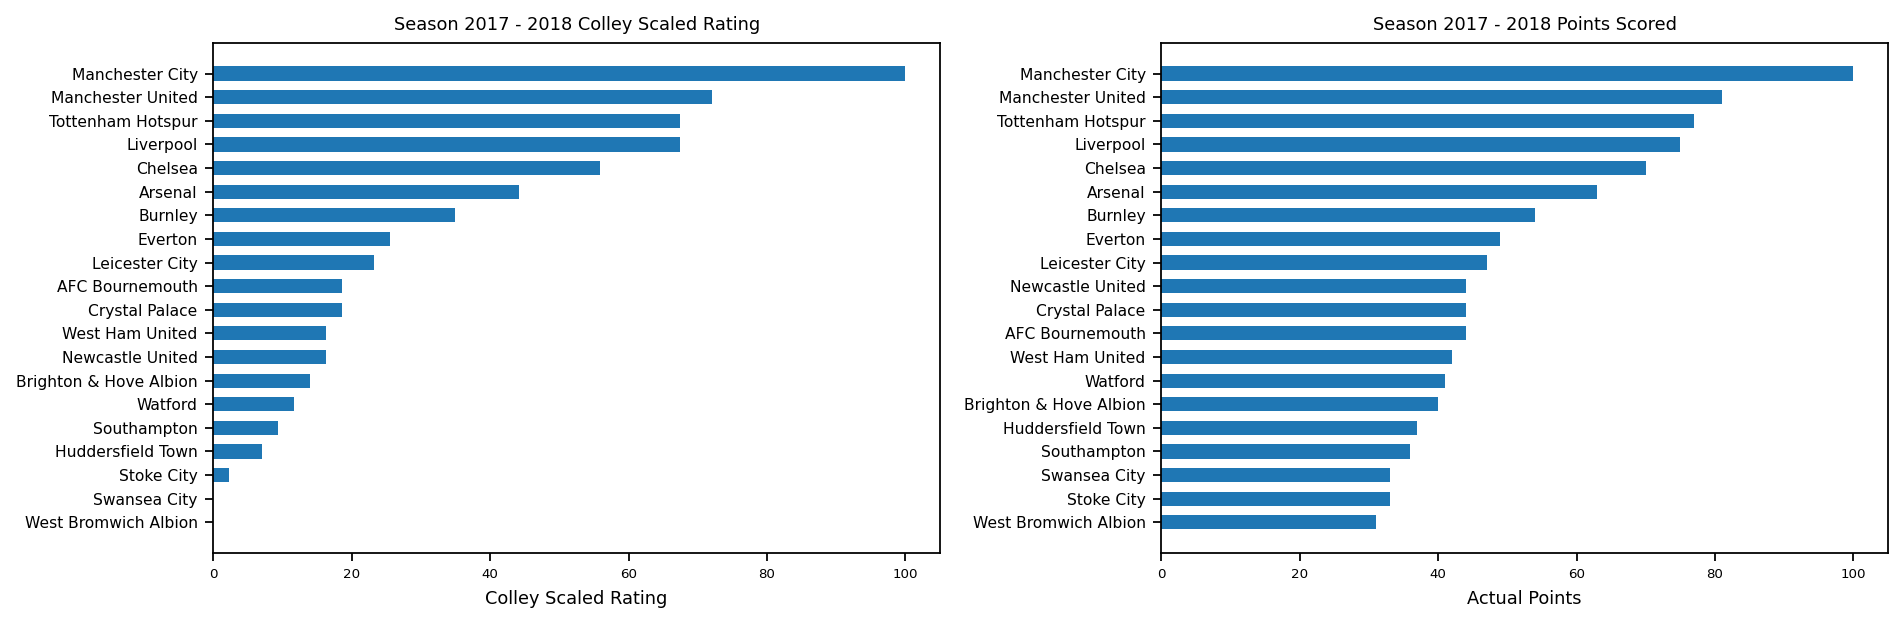

In [55]:
# Initialize grid of plots
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=160)

# Plot Colley scaled rating - plot 0, row 0
axis[0].barh(
    league_table["Colley_Ranking"], 
    league_table["Colley_Scaled_Rating"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[0].set_yticks(
    league_table["Colley_Ranking"], 
    labels=league_table["Teams"],
    fontsize=7
    )
axis[0].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[0].tick_params(axis="x", labelsize=6)
axis[0].set_xlabel('Colley Scaled Rating', fontsize=8)
axis[0].set_title(f'Season {current_season} Colley Scaled Rating', fontsize=8)

# Plot actual ranking and points scored - plot 1, row 0
axis[1].barh(
    league_table["Actual_Ranking"], 
    league_table["Points"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[1].set_yticks(league_table["Actual_Ranking"], 
    labels=league_table["Teams"],
    fontsize=7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[1].tick_params(axis="x", labelsize=6)
axis[1].set_xlabel('Actual Points', fontsize=8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize=8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

# 3. Keener

## For Keener we need the match grid

In [56]:
# Each match entry is in the format ="GH-GA" (except from NaN in diagonal).
# GH are goals scored by the home team, and GA are goals scored by the away team
# Below, we read the match grid CSV and remove '=' and '"'
match_grid = (
    pd.read_csv(current_match_grid_file, dtype=str, index_col=0)
    .replace('"' , '', regex=True)
    .replace('=' , '', regex=True)
    .fillna("0-0")
    )

# Save all teams as a list
teams = match_grid.columns.to_list()
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1
Brighton & Hove Albion,2-2,2-1,0-0,0-0,0-4,0-0,1-1,1-1,0-2,1-5,0-2,1-0,1-0,1-1,2-2,4-1,1-1,1-0,3-1,3-1
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1
Crystal Palace,2-2,2-3,3-2,1-0,2-1,0-0,2-2,0-3,5-0,1-2,0-0,2-3,1-1,0-1,2-1,0-2,0-1,2-1,2-0,2-2
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0
Huddersfield Town,4-1,0-1,2-0,0-0,1-3,0-2,0-2,0-0,1-1,0-3,1-2,2-1,1-0,0-0,1-1,0-0,0-4,1-0,1-0,1-4
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1


## Create Keener S matrix

Below a refresher

$$S_{n \times n} \text{ where } S_{ij} \text{: Total goals scored from team } i \text{ against team } j$$
<br>
$$n \text{ represents the number of teams in the league}$$

## Steps required

1.   Parse scores. Example: "3-2". The home team scored 3 goals and the away team 2. Hint: Pandas [applymap documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html)
2.   Match every team's home match with the respective away match against the same opponent. Hint: The home match of team *i* against *j* is element *ij*. The respective away match is element *ji* - row and column indexes are swapped...

In [57]:
# Parse score and get goals of a home match
home_goals_ij = lambda score: int(score.split("-")[0])
all_home_goals_ij = match_grid.applymap(home_goals_ij)

# Parse score and get goals of an away match
# The grid is transposed to match every team's respective
# home and away matches
away_goals_ij = lambda score: int(score.split("-")[1])
all_away_goals_ij = match_grid.T.applymap(away_goals_ij)

# Sum goals scored
S_dataframe = all_home_goals_ij + all_away_goals_ij

In [58]:
S_dataframe

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United
AFC Bournemouth,0,2,4,3,3,4,3,5,1,0,1,0,3,2,4,1,1,2,2,4
Arsenal,4,0,3,6,2,7,10,6,5,3,1,2,2,4,3,3,2,4,3,4
Brighton & Hove Albion,3,2,0,0,0,2,1,1,0,1,1,1,1,2,3,5,1,1,3,6
Burnley,3,0,0,0,4,1,3,0,2,2,1,2,2,2,2,2,1,3,2,4
Chelsea,1,2,6,4,0,3,2,4,2,2,0,2,3,4,9,2,3,5,7,1
Crystal Palace,4,3,3,1,3,0,3,2,8,1,0,2,1,2,4,1,0,2,2,3
Everton,3,3,3,1,0,5,0,4,2,1,2,0,2,2,3,4,0,3,1,5
Huddersfield Town,4,0,3,0,2,3,0,0,1,0,1,2,1,1,1,0,0,5,3,1
Leicester City,1,6,4,2,1,0,3,4,0,3,1,2,4,4,3,3,6,3,5,1
Liverpool,7,7,9,3,1,3,1,6,5,0,4,1,3,5,3,5,3,8,2,8


## Create Keener A matrix

Below a refresher

$$\mathbf{A}_{n \times n} = \left[\frac{S_{ij}+ 1}{S_{ij} + S_{ji} + 2}\right]_{n \times n}$$
<br>
$$\mathbf{A}_{n \times n} = [a_{ij}] = \left[h\left(\frac{S_{ij}+ 1}{S_{ij} + S_{ji} + 2}\right)\right]_{n \times n}$$
<br>
$$\text{where } h(x) = \frac{1}{2} + \frac{sgn\{x - (1/2)\}\sqrt{|2x - 1|}}{2}$$

## Calculate the Numerator

In [59]:
A_numerator = S_dataframe.copy().to_numpy() + 1
A_numerator

array([[ 1,  3,  5,  4,  4,  5,  4,  6,  2,  1,  2,  1,  4,  3,  5,  2,  2,  3,  3,  5],
       [ 5,  1,  4,  7,  3,  8, 11,  7,  6,  4,  2,  3,  3,  5,  4,  4,  3,  5,  4,  5],
       [ 4,  3,  1,  1,  1,  3,  2,  2,  1,  2,  2,  2,  2,  3,  4,  6,  2,  2,  4,  7],
       [ 4,  1,  1,  1,  5,  2,  4,  1,  3,  3,  2,  3,  3,  3,  3,  3,  2,  4,  3,  5],
       [ 2,  3,  7,  5,  1,  4,  3,  5,  3,  3,  1,  3,  4,  5, 10,  3,  4,  6,  8,  2],
       [ 5,  4,  4,  2,  4,  1,  4,  3,  9,  2,  1,  3,  2,  3,  5,  2,  1,  3,  3,  4],
       [ 4,  4,  4,  2,  1,  6,  1,  5,  3,  2,  3,  1,  3,  3,  4,  5,  1,  4,  2,  6],
       [ 5,  1,  4,  1,  3,  4,  1,  1,  2,  1,  2,  3,  2,  2,  2,  1,  1,  6,  4,  2],
       [ 2,  7,  5,  3,  2,  1,  4,  5,  1,  4,  2,  3,  5,  5,  4,  4,  7,  4,  6,  2],
       [ 8,  8, 10,  4,  2,  4,  2,  7,  6,  1,  5,  2,  4,  6,  4,  6,  4,  9,  3,  9],
       [ 7,  7,  6,  5,  3,  6,  5,  3,  8,  9,  1,  5,  5,  4, 10, 10,  8, 10,  7,  7],
       [ 4,  6,  2,  

## Calculate the Denominator

In [60]:
A_denominator = S_dataframe.copy().to_numpy()
A_denominator += A_denominator.T
A_denominator += 2

## Calculate A

In [61]:
A = np.divide(A_numerator, A_denominator)

## Apply skewing to A

Numpy [vectorize documentation](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html) and [Generalized Universal Function API](https://numpy.org/doc/stable/reference/c-api/generalized-ufuncs.html)

In [62]:
def skewing_function(x):
    numerator = np.sign(x - 0.5) * np.sqrt(np.abs(2 * x - 1))
    return 0.5 + numerator / 2

# Vectorize the skewing function for appying it to a numpy array
ufunc_skewing_function = np.vectorize(skewing_function)
A = ufunc_skewing_function(A)

# Uncomment if you want to inspect the final A matrix
# A

## Calculate Eigenvalues and Eigenvectors

Numpy [documentation on eigenvalues and eigenvectors](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

$$\mathbf{A} \mathbf{r} = λ \mathbf{r}, \mathbf{r} > 0 \text{ and } \sum_{j=1}^{n}r_j = 1$$
<br>
$$λ \text{: Perron value (dominant eigenvalue)}$$
$$\mathbf{r} \text{: Perron vector (dominant eigenvector)}$$
<br>
<br>
$$\text{Looking for the Ratings Vector:}$$
<br>
$$\\\mathbf{r}_{n \times 1} = \begin{pmatrix}
r_1\\
r_2\\
r_3\\
\vdots \\
r_n
\end{pmatrix}$$

In [63]:
eigenvals, eigenvecs = np.linalg.eig(A)
max_eigenvalue_index = np.argmax(eigenvals)

## The imaginary part of the dominant eigenvalue must be 0.

In [64]:
eigenvals[max_eigenvalue_index]

(9.281862889906389+0j)

## Save the Perron value as a float

In [65]:
perron_value = float(eigenvals[max_eigenvalue_index])
print(f"Perron value: {perron_value}")

Perron value: 9.281862889906389


<ipython-input-65-ce07f9298331>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  perron_value = float(eigenvals[max_eigenvalue_index])


## The imaginary part of all the entries in the dominant eigenvector must be zero

In [66]:
eigenvecs[: , max_eigenvalue_index].reshape(-1, 1)

array([[-0.19032472+0.j],
       [-0.2633992 +0.j],
       [-0.17547882+0.j],
       [-0.21770192+0.j],
       [-0.25425007+0.j],
       [-0.18739085+0.j],
       [-0.19454027+0.j],
       [-0.15414491+0.j],
       [-0.21954511+0.j],
       [-0.28528845+0.j],
       [-0.36512934+0.j],
       [-0.31255257+0.j],
       [-0.18606267+0.j],
       [-0.16561804+0.j],
       [-0.15352395+0.j],
       [-0.15172886+0.j],
       [-0.30485764+0.j],
       [-0.17231638+0.j],
       [-0.17158679+0.j],
       [-0.18312368+0.j]])

## Save the real part of the dominant eigenvector entries

This is not the Perron vector yet (we could get all entries as negatives). We use the "Brute Force" technique described in Keener chapter of the textbook to convert this vector to Perron vector.

In [67]:
dominant_eigenvector = eigenvecs[: , 0].reshape(-1, 1).astype(float)
dominant_eigenvector

<ipython-input-67-b33fe18fcda4>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  dominant_eigenvector = eigenvecs[: , 0].reshape(-1, 1).astype(float)


array([[-0.19032472],
       [-0.2633992 ],
       [-0.17547882],
       [-0.21770192],
       [-0.25425007],
       [-0.18739085],
       [-0.19454027],
       [-0.15414491],
       [-0.21954511],
       [-0.28528845],
       [-0.36512934],
       [-0.31255257],
       [-0.18606267],
       [-0.16561804],
       [-0.15352395],
       [-0.15172886],
       [-0.30485764],
       [-0.17231638],
       [-0.17158679],
       [-0.18312368]])

## Calculate the actual Perron vector where all ratings have a sum of 1

In [68]:
# Divide by sum so that all ratings sum to 1
perron_vector = dominant_eigenvector / np.sum(dominant_eigenvector)

In [69]:
match_grid["Keener_Rating"] = perron_vector

In [70]:
match_grid["Keener_Rating"]

AFC Bournemouth           0.044174
Arsenal                   0.061134
Brighton & Hove Albion    0.040728
Burnley                   0.050528
Chelsea                   0.059010
Crystal Palace            0.043493
Everton                   0.045152
Huddersfield Town         0.035776
Leicester City            0.050956
Liverpool                 0.066214
Manchester City           0.084745
Manchester United         0.072542
Newcastle United          0.043184
Southampton               0.038439
Stoke City                0.035632
Swansea City              0.035216
Tottenham Hotspur         0.070756
Watford                   0.039994
West Bromwich Albion      0.039825
West Ham United           0.042502
Name: Keener_Rating, dtype: float64

## Use a MinMaxScaler to scale Keener ratings between 0 and 100 for plotting.

In [71]:
# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
match_grid["Keener_Scaled_Rating"] = min_max_scaler.fit_transform(
    match_grid.loc[:, "Keener_Rating"].values.reshape(-1, 1)
    )

# Sort by Keener rating - strongest team on top, assign Keener ranking
match_grid = match_grid.sort_values("Keener_Rating", ascending=False)
match_grid["Keener_Ranking"] = np.arange(1, 21)

In [72]:
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Keener_Rating,Keener_Scaled_Rating,Keener_Ranking
Manchester City,4-0,3-1,3-1,3-0,1-0,5-0,1-1,0-0,5-1,5-0,0-0,2-3,3-1,2-1,7-2,5-0,4-1,3-1,3-0,2-1,0.084745,100.000000,1
Manchester United,1-0,2-1,1-0,2-2,2-1,4-0,4-0,2-0,2-0,2-1,1-2,0-0,4-1,0-0,3-0,2-0,1-0,1-0,0-1,4-0,0.072542,75.362393,2
Tottenham Hotspur,1-0,1-0,2-0,1-1,1-2,1-0,4-0,2-0,5-4,4-1,1-3,2-0,1-0,5-2,5-1,0-0,0-0,2-0,1-1,1-1,0.070756,71.756530,3
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1,0.066214,62.586358,4
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1,0.061134,52.329002,5
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1,0.059010,48.041696,6
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2,0.050956,31.778867,7
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1,0.050528,30.915142,8
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0,0.045152,20.061537,9
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3,0.044174,18.086120,10


## Import the league table to get actual rankings and points scored

As the match grid does not contain the actual points scored per team, we have to import the league table.

In [73]:
# Read the league table data - skip the first row
league_table = pd.read_csv(current_league_table_file, skiprows=1)
league_table["Actual_Ranking"] = np.arange(1, 21)
league_table

,Unnamed: 0,Unnamed: 1,P,W,D,L,P.1,W.1,D.1,L.1,P.2,W.2,D.2,L.2,F,A,+/-,Pts,Actual_Ranking
0,C,Manchester City,19,16,2,1,19,16,2,1,38,32,4,2,106,27,79,100,1
1,2,Manchester United,19,15,2,2,19,10,4,5,38,25,6,7,68,28,40,81,2
2,3,Tottenham Hotspur,19,13,4,2,19,10,4,5,38,23,8,7,74,36,38,77,3
3,4,Liverpool,19,12,7,0,19,9,5,5,38,21,12,5,84,38,46,75,4
4,5,Chelsea,19,11,4,4,19,10,3,6,38,21,7,10,62,38,24,70,5
5,6,Arsenal,19,15,2,2,19,4,4,11,38,19,6,13,74,51,23,63,6
6,7,Burnley,19,7,5,7,19,7,7,5,38,14,12,12,36,39,-3,54,7
7,8,Everton,19,10,4,5,19,3,6,10,38,13,10,15,44,58,-14,49,8
8,9,Leicester City,19,7,6,6,19,5,5,9,38,12,11,15,56,60,-4,47,9
9,10,Newcastle United,19,8,4,7,19,4,4,11,38,12,8,18,39,47,-8,44,10


## We keep only teams, actual ranking and points.

In [74]:
required_cols = ["Unnamed: 1", "Pts", "Actual_Ranking"]
renaming = {"Unnamed: 1": "Teams", "Pts": "Points"}

# Make a copy of the league table, keeping only the necessary columns renamed
# Index is reset as the teams for the table join below
league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
    .set_index("Teams")
)

league_table

,Points,Actual_Ranking
Teams,,
Manchester City,100,1
Manchester United,81,2
Tottenham Hotspur,77,3
Liverpool,75,4
Chelsea,70,5
Arsenal,63,6
Burnley,54,7
Everton,49,8
Leicester City,47,9


## Join the match grid that holds Keener ratings with the league table and the actual ratings based on team names

In [75]:
match_grid = match_grid.join(league_table)
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Keener_Rating,Keener_Scaled_Rating,Keener_Ranking,Points,Actual_Ranking
Manchester City,4-0,3-1,3-1,3-0,1-0,5-0,1-1,0-0,5-1,5-0,0-0,2-3,3-1,2-1,7-2,5-0,4-1,3-1,3-0,2-1,0.084745,100.000000,1,100,1
Manchester United,1-0,2-1,1-0,2-2,2-1,4-0,4-0,2-0,2-0,2-1,1-2,0-0,4-1,0-0,3-0,2-0,1-0,1-0,0-1,4-0,0.072542,75.362393,2,81,2
Tottenham Hotspur,1-0,1-0,2-0,1-1,1-2,1-0,4-0,2-0,5-4,4-1,1-3,2-0,1-0,5-2,5-1,0-0,0-0,2-0,1-1,1-1,0.070756,71.756530,3,77,3
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1,0.066214,62.586358,4,75,4
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1,0.061134,52.329002,5,63,6
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1,0.059010,48.041696,6,70,5
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2,0.050956,31.778867,7,47,9
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1,0.050528,30.915142,8,54,7
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0,0.045152,20.061537,9,49,8
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3,0.044174,18.086120,10,44,12


## Add Keener to the dataset that holds results from Massey and Colley

In [76]:
cols_to_keep = [
    "Keener_Rating", 
    "Keener_Scaled_Rating", 
    "Keener_Ranking"
    ]

# Data needed from Keener output - sort by actual ranking first
data_to_keep = (
    match_grid
    .sort_values("Actual_Ranking", ascending=True)
    .loc[:, cols_to_keep]
    .copy()
    .reset_index(drop=False)
    .rename(columns={"index": "Teams"})
    )

compiled_results = (compiled_results.merge(data_to_keep, on="Teams"))
compiled_results

,Teams,Total_Matches_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking,Massey_Rating,Massey_Scaled_Rating,Massey_Ranking,Wins,Draws,Losses,Colley_Rating,Colley_Scaled_Rating,Colley_Ranking,Keener_Rating,Keener_Scaled_Rating,Keener_Ranking
0,Manchester City,38,106,27,79,100,1,1.942105,100.000000,1,32,4,2,0.857143,100.000000,1,0.084745,100.000000,1
1,Manchester United,38,68,28,40,81,2,0.967105,65.178571,3,25,6,7,0.714286,72.093023,2,0.072542,75.362393,2
2,Tottenham Hotspur,38,74,36,38,77,3,0.917105,63.392857,4,23,8,7,0.690476,67.441860,3,0.070756,71.756530,3
3,Liverpool,38,84,38,46,75,4,1.117105,70.535714,2,21,12,5,0.690476,67.441860,4,0.066214,62.586358,4
4,Chelsea,38,62,38,24,70,5,0.567105,50.892857,5,21,7,10,0.630952,55.813953,5,0.059010,48.041696,6
5,Arsenal,38,74,51,23,63,6,0.542105,50.000000,6,19,6,13,0.571429,44.186047,6,0.061134,52.329002,5
6,Burnley,38,36,39,-3,54,7,-0.107895,26.785714,7,14,12,12,0.523810,34.883721,7,0.050528,30.915142,8
7,Everton,38,44,58,-14,49,8,-0.382895,16.964286,11,13,10,15,0.476190,25.581395,8,0.045152,20.061537,9
8,Leicester City,38,56,60,-4,47,9,-0.132895,25.892857,8,12,11,15,0.464286,23.255814,9,0.050956,31.778867,7
9,Newcastle United,38,39,47,-8,44,10,-0.232895,22.321429,9,12,8,18,0.428571,16.279070,13,0.043184,16.088910,12


## Plot Keener scaled rating and ranking side by side with actual ranking and points scored

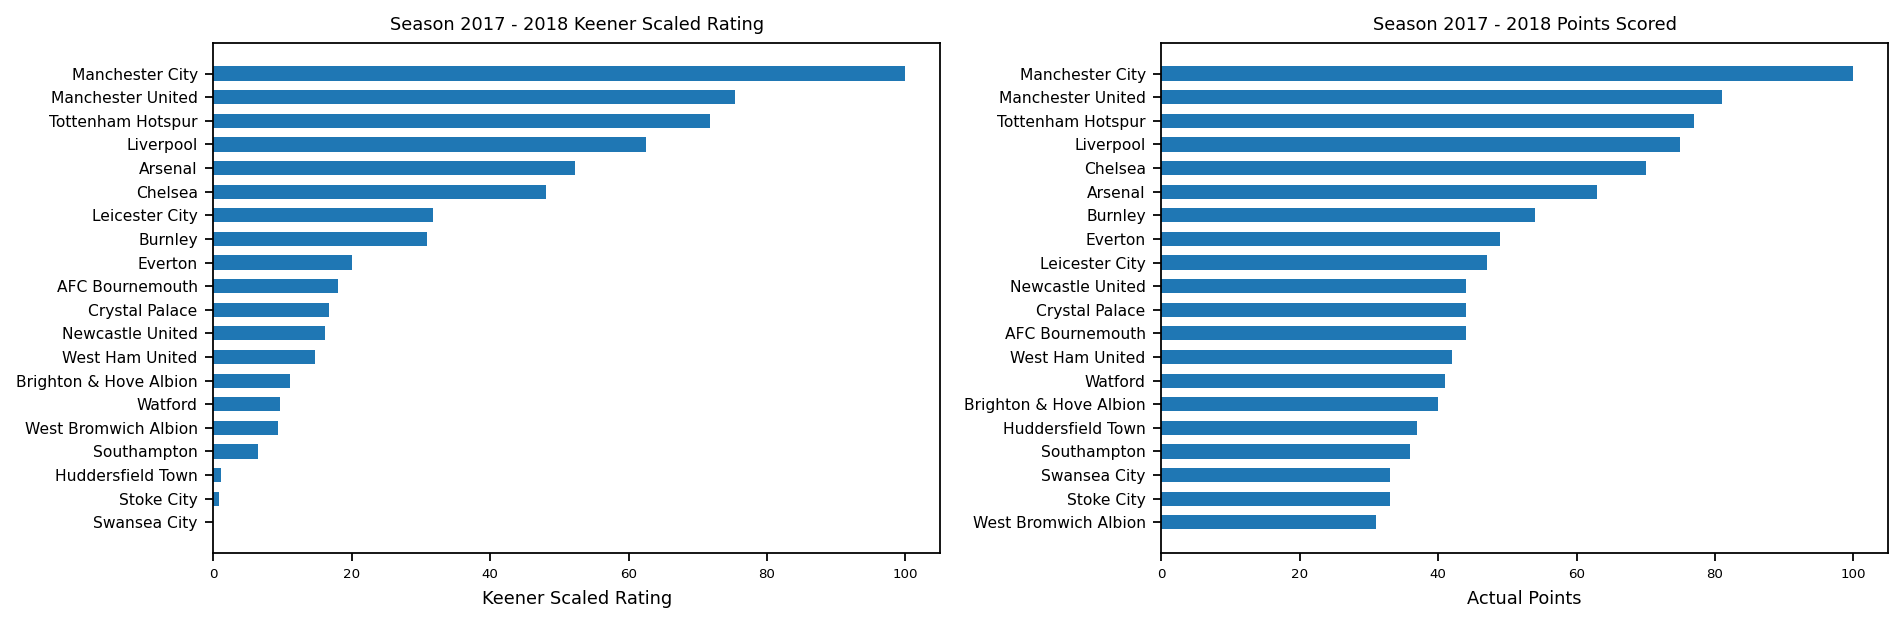

In [77]:
# Initialize grid of plots
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=160)

# Plot Keener scaled rating - plot 0, row 0
axis[0].barh(
    match_grid["Keener_Ranking"], 
    match_grid["Keener_Scaled_Rating"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[0].set_yticks(
    match_grid["Keener_Ranking"], 
    labels=match_grid.index,
    fontsize=7
    )
axis[0].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[0].tick_params(axis="x", labelsize=6)
axis[0].set_xlabel('Keener Scaled Rating', fontsize=8)
axis[0].set_title(f'Season {current_season} Keener Scaled Rating', fontsize=8)

# Plot actual ranking and point scored - plot 1, row 0
axis[1].barh(
    match_grid["Actual_Ranking"], 
    match_grid["Points"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[1].set_yticks(
    match_grid["Actual_Ranking"], 
    labels=match_grid.index,
    fontsize=7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[1].tick_params(axis="x", labelsize=6)
axis[1].set_xlabel('Actual Points', fontsize=8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize=8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

## Get rankings from all methods in a new table

In [78]:
rankings = [
    "Teams", 
    "Actual_Ranking", 
    "Massey_Ranking", 
    "Colley_Ranking", 
    "Keener_Ranking"
    ]
ranks_df = compiled_results.loc[:, rankings].copy()
ranks_df

,Teams,Actual_Ranking,Massey_Ranking,Colley_Ranking,Keener_Ranking
0,Manchester City,1,1,1,1
1,Manchester United,2,3,2,2
2,Tottenham Hotspur,3,4,3,3
3,Liverpool,4,2,4,4
4,Chelsea,5,5,5,6
5,Arsenal,6,6,6,5
6,Burnley,7,7,7,8
7,Everton,8,11,8,9
8,Leicester City,9,8,9,7
9,Newcastle United,10,9,13,12


In [79]:
ranks_df.corr()

,Actual_Ranking,Massey_Ranking,Colley_Ranking,Keener_Ranking
Actual_Ranking,1.000000,0.957895,0.984962,0.968421
Massey_Ranking,0.957895,1.000000,0.945865,0.957895
Colley_Ranking,0.984962,0.945865,1.000000,0.977444
Keener_Ranking,0.968421,0.957895,0.977444,1.000000


## Import the table of the subsequent season to check

In [80]:
# Read the league table data - skip the first row
next_league_table = pd.read_csv(coming_league_table_file, skiprows=1)
next_league_table["Actual_Ranking"] = np.arange(1, 21)

# Uncomment if you want to see the raw table
# league_table

## Keep some of the columns and rename them

In [81]:
required_cols = ["Unnamed: 1", "P.2", "W.2", "D.2", "L.2", "F", "A", "+/-", "Pts", "Actual_Ranking"]
renaming = {
    "Unnamed: 1": "Teams", 
    "P.2": "Total_Matches_Played", 
    "W.2": "Total_Wins",
    "D.2": "Total_Draws",
    "L.2": "Total_Losses",
    "F": "Goals_Scored",
    "A": "Goals_Conceded",
    "+/-": "Goal_Difference",
    "Pts": "Points"
    }

# Make a copy of the league table, keeping only the necessary columns renamed
next_league_table = (
    next_league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
)

next_league_table

,Teams,Total_Matches_Played,Total_Wins,Total_Draws,Total_Losses,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking
0,Manchester City,38,32,2,4,95,23,72,98,1
1,Liverpool,38,30,7,1,89,22,67,97,2
2,Chelsea,38,21,9,8,63,39,24,72,3
3,Tottenham Hotspur,38,23,2,13,67,39,28,71,4
4,Arsenal,38,21,7,10,73,51,22,70,5
5,Manchester United,38,19,9,10,65,54,11,66,6
6,Wolverhampton Wanderers,38,16,9,13,47,46,1,57,7
7,Everton,38,15,9,14,54,46,8,54,8
8,Leicester City,38,15,7,16,51,48,3,52,9
9,West Ham United,38,15,7,16,52,55,-3,52,10


## Recall estimated rankings from Massey, Colley and Keener

In [82]:
ranks_df

,Teams,Actual_Ranking,Massey_Ranking,Colley_Ranking,Keener_Ranking
0,Manchester City,1,1,1,1
1,Manchester United,2,3,2,2
2,Tottenham Hotspur,3,4,3,3
3,Liverpool,4,2,4,4
4,Chelsea,5,5,5,6
5,Arsenal,6,6,6,5
6,Burnley,7,7,7,8
7,Everton,8,11,8,9
8,Leicester City,9,8,9,7
9,Newcastle United,10,9,13,12
